# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 16.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 18.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 22.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.7 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_token_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [5]:
client = MongoClient(mongod_connect)
db = client.gp9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [6]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [7]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [8]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1325291506903773190
1325291506845020160
1325291506941505537
1325291506891042816
1325291506991722496
1325291507092393984
1325291507163815937
1325291507209924611
1325291507239153665
1325291507423703040
1325291507528597504
1325291507579031553
1325291507646074880
1325291507688091649
1325291507289624576
1325291507834785794
1325291507914510336
1325291508048691200
1325291507906191362
1325291508111532033
1325291508182999042
1325291508099149826
1325291508300455938
1325291508115755008
1325291508283531265
1325291508342337538
1325291508434571266
1325291508480798726
1325291508816375808
1325291508812148737
1325291508644208641
1325291508786991104
1325291508795379712
1325291508858294277
1325291508849913857
1325291508862382081
1325291508937809921
1325291509202169856
1325291509189586944
1325291509172875264
1325291509252493312
1325291509294436352
1325291509298552836
1325291509256773633
1325291509353238530
1325291509499957248
1325291509395181569
1325291509411934209
1325291509403561985
1325291509546020865


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [11]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 08 04:18:45 +0000 2020'
'Sun Nov 08 04:17:49 +0000 2020'
'Sun Nov 08 04:15:41 +0000 2020'
'Sun Nov 08 04:14:54 +0000 2020'
'Sun Nov 08 04:12:40 +0000 2020'
'Sun Nov 08 04:12:29 +0000 2020'
'Sun Nov 08 04:12:14 +0000 2020'
'Sun Nov 08 04:11:54 +0000 2020'
'Sun Nov 08 04:11:07 +0000 2020'
'Sun Nov 08 04:10:54 +0000 2020'
'Sun Nov 08 04:10:44 +0000 2020'
'Sun Nov 08 04:09:34 +0000 2020'
'Sun Nov 08 04:09:20 +0000 2020'
'Sun Nov 08 04:08:21 +0000 2020'
'Sun Nov 08 04:08:02 +0000 2020'
'Sun Nov 08 04:07:33 +0000 2020'
'Sun Nov 08 04:04:45 +0000 2020'
'Sun Nov 08 04:04:18 +0000 2020'
'Sun Nov 08 04:04:01 +0000 2020'
'Sun Nov 08 04:02:57 +0000 2020'
'Sun Nov 08 04:00:38 +0000 2020'
'Sun Nov 08 03:59:56 +0000 2020'
'Sun Nov 08 03:57:58 +0000 2020'
'Sun Nov 08 03:56:18 +0000 2020'
'Sun Nov 08 03:54:43 +0000 2020'
'Sun Nov 08 03:52:02 +0000 2020'
'Sun Nov 08 03:50:39 +0000 2020'
'Sun Nov 08 03:48:52 +0000 2020'
'Sun Nov 08 03:43:29 +0000 2020'
'Sun Nov 08 03:42:01 +0000 2020'
'Sun Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [12]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 08 03:36:34 +0000 2020'
'Sun Nov 08 03:33:08 +0000 2020'
'Sun Nov 08 03:31:45 +0000 2020'
'Sun Nov 08 03:29:11 +0000 2020'
'Sun Nov 08 03:26:07 +0000 2020'
'Sun Nov 08 03:24:41 +0000 2020'
'Sun Nov 08 03:21:38 +0000 2020'
'Sun Nov 08 03:20:27 +0000 2020'
'Sun Nov 08 03:18:39 +0000 2020'
'Sun Nov 08 03:18:33 +0000 2020'
'Sun Nov 08 03:18:29 +0000 2020'
'Sun Nov 08 03:17:46 +0000 2020'
'Sun Nov 08 03:17:37 +0000 2020'
'Sun Nov 08 03:16:54 +0000 2020'
'Sun Nov 08 03:15:54 +0000 2020'
'Sun Nov 08 03:15:35 +0000 2020'
'Sun Nov 08 03:15:31 +0000 2020'
'Sun Nov 08 03:15:02 +0000 2020'
'Sun Nov 08 03:14:29 +0000 2020'
'Sun Nov 08 03:13:50 +0000 2020'
'Sun Nov 08 03:13:05 +0000 2020'
'Sun Nov 08 03:12:28 +0000 2020'
'Sun Nov 08 03:12:02 +0000 2020'
'Sun Nov 08 03:11:46 +0000 2020'
'Sun Nov 08 03:11:07 +0000 2020'
'Sun Nov 08 03:11:06 +0000 2020'
'Sun Nov 08 03:10:12 +0000 2020'
'Sun Nov 08 03:10:01 +0000 2020'
'Sun Nov 08 03:09:01 +0000 2020'
'Sun Nov 08 03:08:36 +0000 2020'
'Sun Nov 0

'Sat Nov 07 23:47:43 +0000 2020'
'Sat Nov 07 23:47:00 +0000 2020'
'Sat Nov 07 23:45:40 +0000 2020'
'Sat Nov 07 23:45:39 +0000 2020'
'Sat Nov 07 23:45:31 +0000 2020'
'Sat Nov 07 23:45:11 +0000 2020'
'Sat Nov 07 23:44:58 +0000 2020'
'Sat Nov 07 23:41:02 +0000 2020'
'Sat Nov 07 23:40:39 +0000 2020'
'Sat Nov 07 23:40:37 +0000 2020'
'Sat Nov 07 23:38:45 +0000 2020'
'Sat Nov 07 23:38:40 +0000 2020'
'Sat Nov 07 23:38:26 +0000 2020'
'Sat Nov 07 23:38:10 +0000 2020'
'Sat Nov 07 23:37:22 +0000 2020'
'Sat Nov 07 23:35:29 +0000 2020'
'Sat Nov 07 23:33:33 +0000 2020'
'Sat Nov 07 23:32:30 +0000 2020'
'Sat Nov 07 23:32:09 +0000 2020'
'Sat Nov 07 23:30:59 +0000 2020'
'Sat Nov 07 23:30:08 +0000 2020'
'Sat Nov 07 23:29:42 +0000 2020'
'Sat Nov 07 23:29:41 +0000 2020'
'Sat Nov 07 23:29:28 +0000 2020'
'Sat Nov 07 23:29:28 +0000 2020'
'Sat Nov 07 23:29:26 +0000 2020'
'Sat Nov 07 23:29:01 +0000 2020'
'Sat Nov 07 23:28:30 +0000 2020'
'Sat Nov 07 23:27:11 +0000 2020'
'Sat Nov 07 23:25:54 +0000 2020'
'Sat Nov 0

'Sat Nov 07 20:56:41 +0000 2020'
'Sat Nov 07 20:56:00 +0000 2020'
'Sat Nov 07 20:55:28 +0000 2020'
'Sat Nov 07 20:55:03 +0000 2020'
'Sat Nov 07 20:54:35 +0000 2020'
'Sat Nov 07 20:53:30 +0000 2020'
'Sat Nov 07 20:53:26 +0000 2020'
'Sat Nov 07 20:52:41 +0000 2020'
'Sat Nov 07 20:50:36 +0000 2020'
'Sat Nov 07 20:49:14 +0000 2020'
'Sat Nov 07 20:48:30 +0000 2020'
'Sat Nov 07 20:48:09 +0000 2020'
'Sat Nov 07 20:46:28 +0000 2020'
'Sat Nov 07 20:45:02 +0000 2020'
'Sat Nov 07 20:44:50 +0000 2020'
'Sat Nov 07 20:44:21 +0000 2020'
'Sat Nov 07 20:44:17 +0000 2020'
'Sat Nov 07 20:43:50 +0000 2020'
'Sat Nov 07 20:43:17 +0000 2020'
'Sat Nov 07 20:43:09 +0000 2020'
'Sat Nov 07 20:42:54 +0000 2020'
'Sat Nov 07 20:41:36 +0000 2020'
'Sat Nov 07 20:40:48 +0000 2020'
'Sat Nov 07 20:38:17 +0000 2020'
'Sat Nov 07 20:37:16 +0000 2020'
'Sat Nov 07 20:36:55 +0000 2020'
'Sat Nov 07 20:36:44 +0000 2020'
'Sat Nov 07 20:35:09 +0000 2020'
'Sat Nov 07 20:32:58 +0000 2020'
'Sat Nov 07 20:32:53 +0000 2020'
'Sat Nov 0

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [13]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1048
902


Create a text index and print the Tweets containing specific keywords. 

In [14]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [16]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Bruce Eppard
text: Trump claims that there was inexperienced people on the voting machines when they was counting the votes but yet th… https://t.co/l5pxewFiST
----
name: Mrs. Jenn S.
text: They have statisticians that call the election. Votes will be voted and counted. As a Democrat seeing someone who k… https://t.co/zTH6tWk3T1
----
name: Paul Mickey
text: Notice how Biden said that they wanted ALL votes counted instead of ALL Legal votes. This election was clearly a co… https://t.co/4cKBYLYQYM
----
name: Jeff McNair
text: What will be done about the election fraud and the dead people voting again. Tons of dead people voted for Obama no… https://t.co/HKa0f87vHN
----
name: Jungle Jim
text: @CBSNews It sure took a long time to count the votes.  Texas had it’s 11 million plus votes counted Election Day plus one.
----
name: Caleb Smith
text: @ryanaston Yep, I think we voted the same on that election
----
name: GizzardLizzard
text: @realDonaldTrump The most votes ever cast for t

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [18]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,retweeted_status
0,5fa7728e98c6a356db82eabc,Sun Nov 08 04:12:29 +0000 2020,1325290066151944193,1325290066151944193,Trump claims that there was inexperienced peop...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa7732998c6a356db82ed83,Sat Nov 07 19:38:59 +0000 2020,1325160842158071808,1325160842158071808,They have statisticians that call the election...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.325160e+18,1325159714427035649,{'created_at': 'Sat Nov 07 19:34:30 +0000 2020...,False,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa7732998c6a356db82ed82,Sat Nov 07 19:39:29 +0000 2020,1325160967974625280,1325160967974625280,Notice how Biden said that they wanted ALL vot...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fa7732698c6a356db82ecbc,Sat Nov 07 21:23:47 +0000 2020,1325187216440762368,1325187216440762368,What will be done about the election fraud and...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fa7732398c6a356db82ec1b,Sat Nov 07 23:06:02 +0000 2020,1325212948218961921,1325212948218961921,@CBSNews It sure took a long time to count the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.325161e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fa7731c98c6a356db82eb19,Sun Nov 08 02:39:11 +0000 2020,1325266589114126336,1325266589114126336,"@ryanaston Yep, I think we voted the same on t...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.325265e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fa7732298c6a356db82ebea,Sat Nov 07 23:45:40 +0000 2020,1325222920503881730,1325222920503881730,@realDonaldTrump The most votes ever cast for ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.325195e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fa7728e98c6a356db82ead0,Sun Nov 08 03:52:02 +0000 2020,1325284922068758530,1325284922068758530,@RickieRogue @KEEMSTAR Problem is that the ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.325280e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fa7718a98c6a356db82e9a6,Sun Nov 08 04:18:13 +0000 2020,1325291508795379712,1325291508795379712,This is significant. It is mathematically impo...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,1.324409e+18,1324408618880557060,{'created_at': 'Thu Nov 05 17:49:55 +0000 2020...,NaN,"{'url': 'https://t.co/JNG2Cl3sy1', 'expanded':...",0.0,0.0,low,1604809093079,NaN
9,5fa7732398c6a356db82ec26,Sat Nov 07 22:58:25 +0000 2020,1325211028280340483,1325211028280340483,@JulianCastro @KamalaHarris More Hispanics vot...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.32

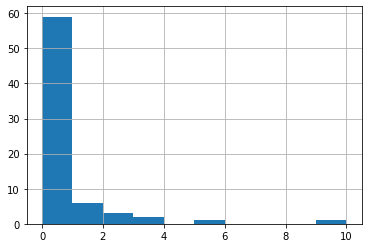

In [19]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count